<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/31Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from mpl_toolkits import mplot3d

In [2]:
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

Certainly! The plt.gca().annotate() function is used to add text annotations with optional arrows to a plot. Let's break down the example you saw:

text: This is the string of text that will be displayed on the plot. In your example, it was either 'min of\nempirical risk' or 'min of risk'. The \n creates a line break in the text.

xy: This specifies the coordinates of the point being annotated (the "target" of the arrow). In your example:

(1.0, -1.2) for 'min of empirical risk' means the arrow is pointing to the exact location (x=1.0, y=-1.2) on the plot.
(1.1, -1.05) for 'min of risk' means the arrow points to (x=1.1, y=-1.05).
xytext: This specifies the coordinates where the text itself will be placed. In your example:

(0.5, -1.1) means the text 'min of empirical risk' is displayed at (x=0.5, y=-1.1).
(0.95, -0.5) means the text 'min of risk' is displayed at (x=0.95, y=-0.5).
arrowprops=dict(arrowstyle='->'): This is an optional argument that defines the properties of the arrow. Here, arrowstyle='->' tells Matplotlib to draw a simple arrow pointing from xytext (where the text is) to xy (the annotated point).

In essence, you're telling Matplotlib: "Put this text at xytext, and draw an arrow from that text to the point xy on the graph."

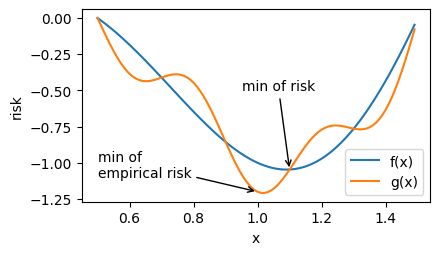

In [3]:
def annotate(text, xy, xytext):
    plt.gca().annotate(text, xy=xy, xytext=xytext,
                           arrowprops=dict(arrowstyle='->'))

x = torch.arange(0.5, 1.5, 0.01)

plt.figure(figsize=(4.5, 2.5))
plt.plot(x.detach().numpy(), f(x).detach().numpy(), label='f(x)')
plt.plot(x.detach().numpy(), g(x).detach().numpy(), label='g(x)')
plt.xlabel('x')
plt.ylabel('risk')
plt.legend()
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))
plt.show()

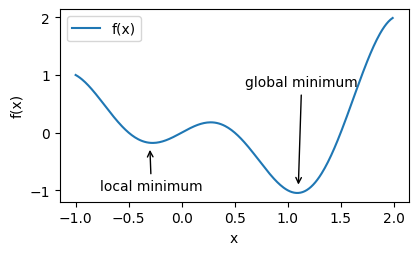

In [4]:
x = torch.arange(-1.0, 2.0, 0.01)

plt.figure(figsize=(4.5, 2.5))
plt.plot(x.detach().numpy(), f(x).detach().numpy(), label='f(x)') # Plot f(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global minimum', (1.1, -0.95), (0.6, 0.8))
plt.show()

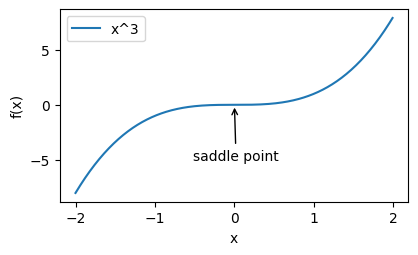

In [5]:
x = torch.arange(-2.0, 2.0, 0.01)

plt.figure(figsize=(4.5, 2.5))
plt.plot(x.detach().numpy(), (x**3).detach().numpy(), label='x^3') # Plot x^3
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
annotate('saddle point', (0, 0), (-0.52, -5.0))
plt.show()

Certainly! In the ax.plot_wireframe function, rstride and cstride control the density of the wireframe grid. Let me explain:

rstride (row stride): This parameter determines the stride (or step size) between rows of the surface grid that are plotted. If you have a grid of points, rstride=10 means that only every 10th row of data will be drawn as a wireframe line. A larger rstride value will result in a coarser grid (fewer lines in one direction), while a smaller value will make the grid denser.

cstride (column stride): Similar to rstride, this parameter determines the stride between columns of the surface grid that are plotted. cstride=10 means only every 10th column of data will be drawn as a wireframe line. A larger cstride value will result in a coarser grid (fewer lines in the other direction).

In your example, **{'rstride': 10, 'cstride': 10} means that the wireframe plot will draw lines for every 10th row and every 10th column of your x, y, and z data grids. This helps to visualize the surface without plotting every single point, which can make the plot too dense or slow to render for large datasets.

-------

Certainly! The line ax.plot([0], [0], [0], 'rx') is used to add a specific marker at a particular point on your 3D plot. Let's break it down:

ax.plot(...): This is the standard plotting function when working with a Matplotlib axes object (ax). While plot is often used for lines, it can also be used to draw markers at specific points.

[0], [0], [0]: These are the coordinates for the point you want to plot in 3D space. They correspond to the x, y, and z coordinates, respectively. So, [0], [0], [0] means you are plotting at the origin (x=0, y=0, z=0).

'rx': This is a format string that specifies how the marker should look:

'r': Stands for 'red' color.
'x': Specifies that the marker shape should be an 'x'.
So, in summary, this line of code plots a red 'x' marker at the origin (0, 0, 0) of your 3D graph. This is often used to highlight important points, like the saddle point in your example.

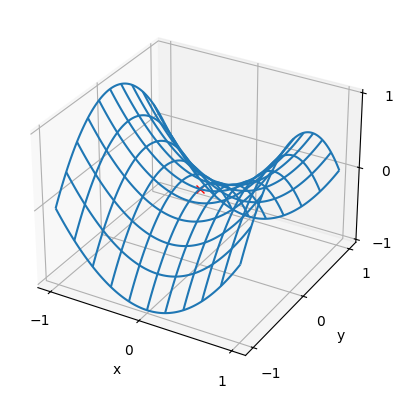

In [6]:
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101), indexing='ij')
z = x**2 - y**2

fig = plt.figure() # Use plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x.detach().numpy(), y.detach().numpy(), z.detach().numpy(), **{'rstride': 10, 'cstride': 10})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
ax.set_xticks(ticks) # Use ax.set_xticks for 3D axes
ax.set_yticks(ticks) # Use ax.set_yticks for 3D axes
ax.set_zticks(ticks)
ax.set_xlabel('x') # Use ax.set_xlabel for 3D axes
ax.set_ylabel('y'); # Use ax.set_ylabel for 3D axes
plt.show()

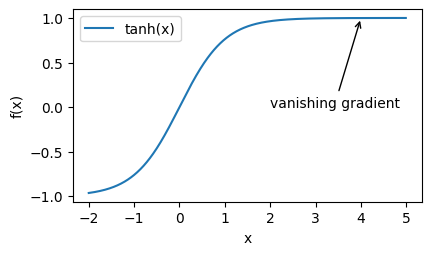

In [7]:
x = torch.arange(-2.0, 5.0, 0.01)

plt.figure(figsize=(4.5, 2.5))
plt.plot(x.detach().numpy(), torch.tanh(x).detach().numpy(), label='tanh(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
annotate('vanishing gradient', (4, 1), (2, 0.0))
plt.show()